In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [66]:
X, y = load('../../preprocessing/clustering_data.joblib')


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142913 entries, 0 to 142912
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 142913 non-null  float64
 1   year                               142913 non-null  float64
 2   loan_amount                        142913 non-null  float64
 3   rate_of_interest                   142913 non-null  float64
 4   Interest_rate_spread               142913 non-null  float64
 5   Upfront_charges                    142913 non-null  float64
 6   property_value                     142913 non-null  float64
 7   income                             142913 non-null  float64
 8   Credit_Score                       142913 non-null  float64
 9   LTV                                142913 non-null  float64
 10  dtir1                              142913 non-null  float64
 11  loan_limit_ncf                     1429

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X

array([[ 1.30641187,  0.01492054],
       [ 1.40873345,  0.15341445],
       [-0.05359743, -0.00211167],
       ...,
       [-1.79826639,  0.0303971 ],
       [ 0.59676436, -0.15320978],
       [ 0.73115613, -0.2580508 ]])

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [70]:
def visualize_clustering(centers, labels, features, alg_name):
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")
    plt.scatter(features[0], features[1], c = labels)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('{} {} clusters'.format(alg_name, len(centers)))
    plt.show()

In [71]:
from sklearn. cluster import BisectingKMeans

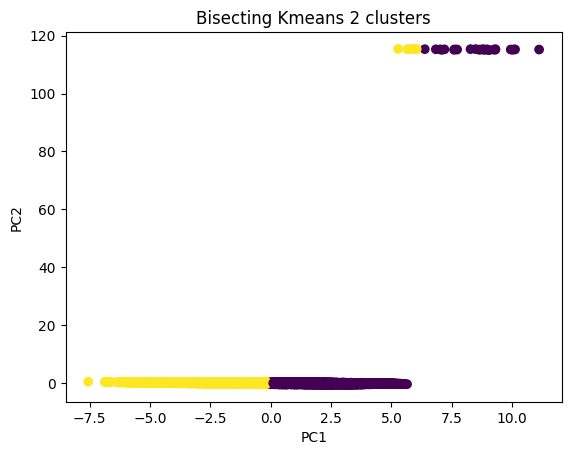

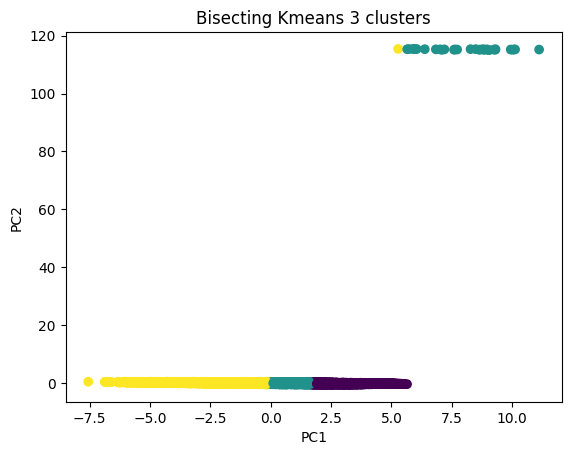

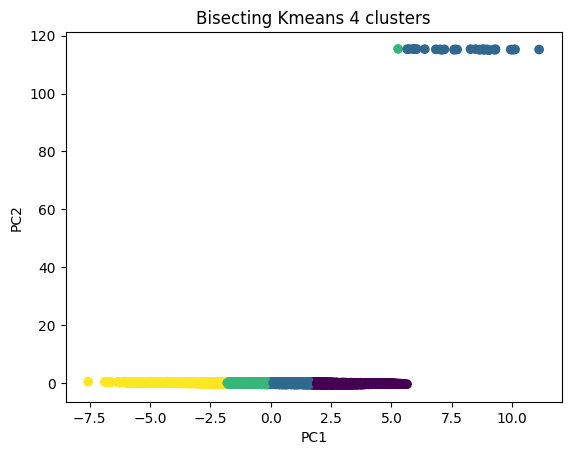

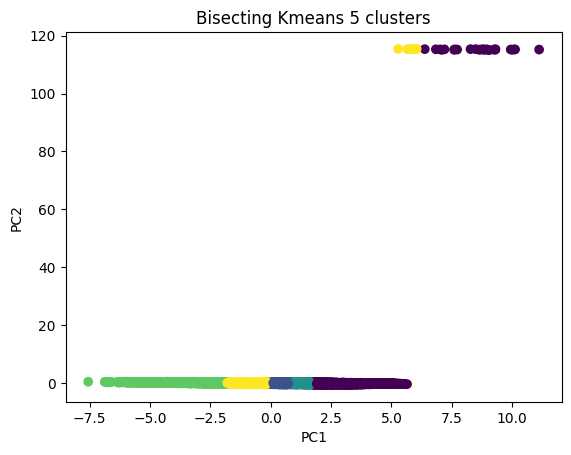

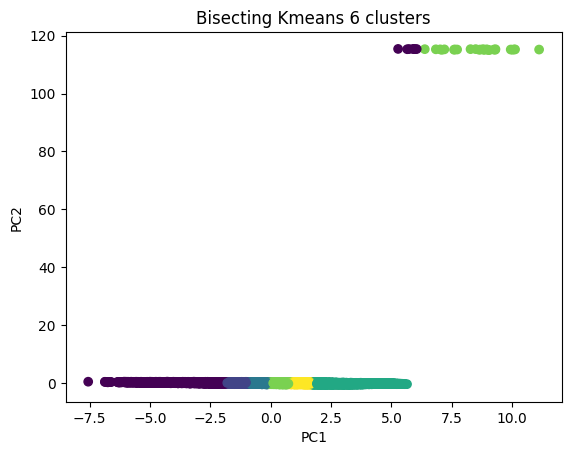

In [72]:
kmeans_cluster_centers = []
sse = []
silhouettes = []
for i in range (2, 7):
    bkmeans = BisectingKMeans(n_clusters=i,bisecting_strategy='largest_cluster')
    bkmeans.fit(X)
    visualize_clustering(bkmeans.cluster_centers_, bkmeans.labels_, [X[:, 0], X[:, 1]], "Bisecting Kmeans")
    kmeans_cluster_centers.append(bkmeans.cluster_centers_)
    sse.append(bkmeans.inertia_)
    silhouettes.append(silhouette_score(X, bkmeans.labels_))

In [73]:
sse

[597534.1761459443,
 539669.7348015145,
 481682.9626691711,
 472386.96767986607,
 464485.4457452089]

In [74]:
silhouettes

[0.5552601986196362,
 0.47798326188493384,
 0.498212295255774,
 0.42661098318912916,
 0.4166288715715304]

Text(0, 0.5, 'SSE')

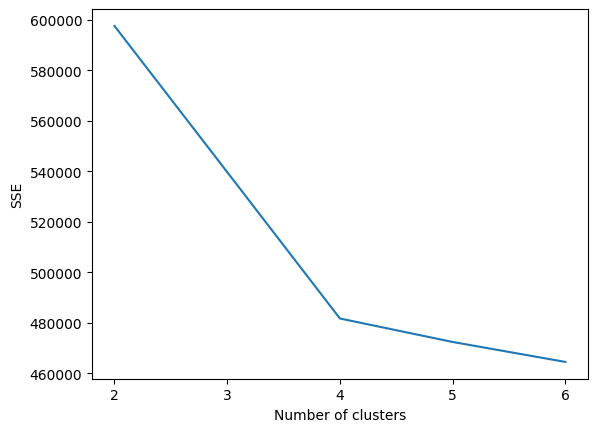

In [75]:
plt.plot(range(2, 7), sse)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

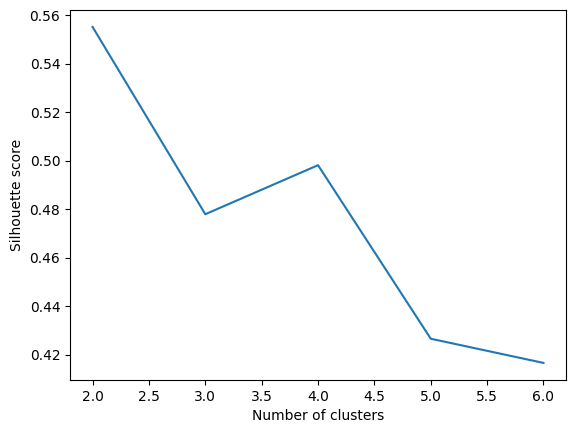

In [76]:
plt.plot(range(2, 7), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [88]:
sse2 = []
silhouettes2 = []

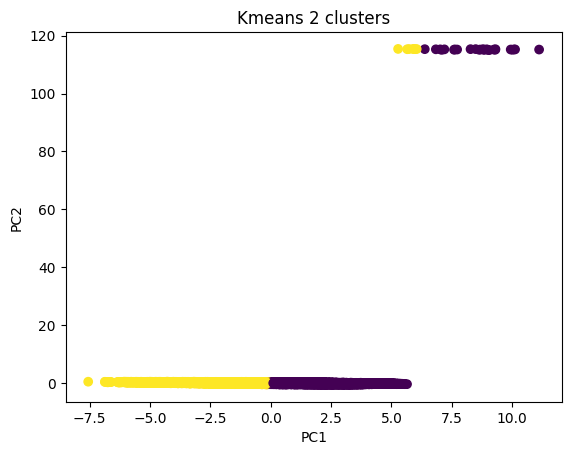

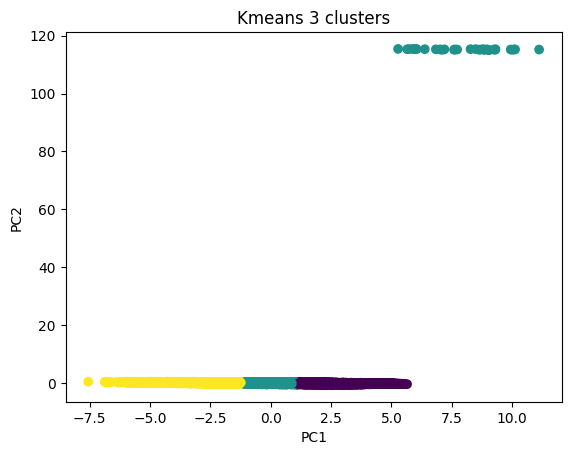

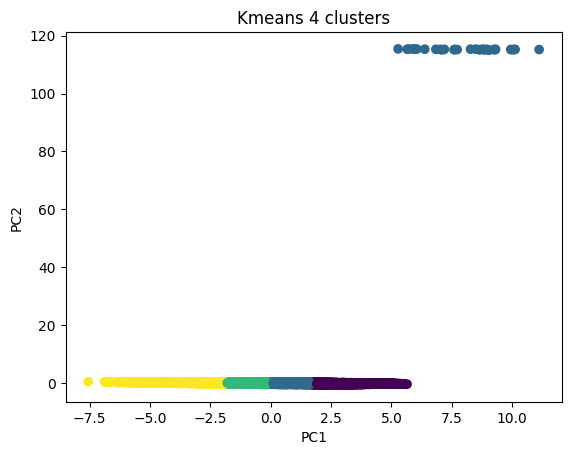

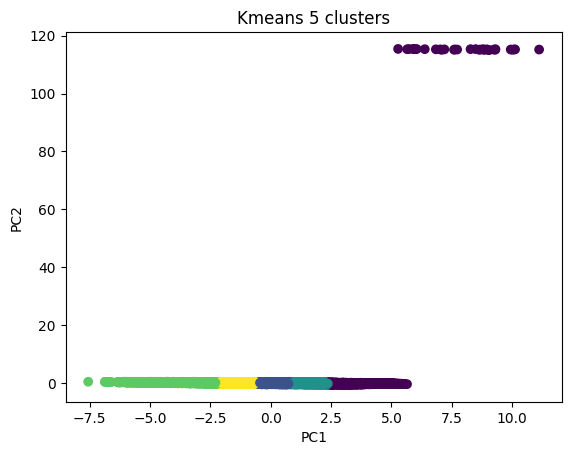

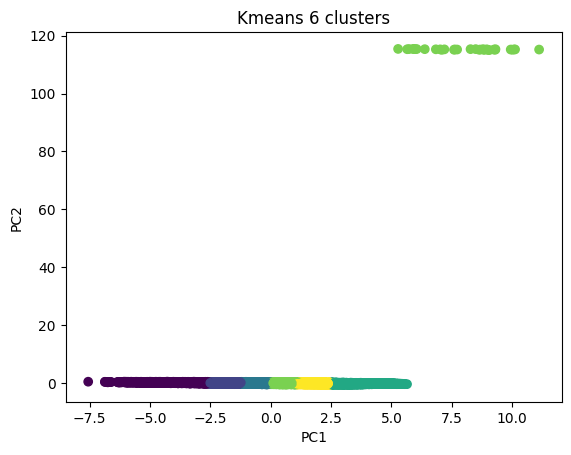

In [80]:
for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, init=kmeans_cluster_centers[i - 2], n_init=1)
    kmeans.fit(X)
    visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X[:, 0], X[:, 1]], "Kmeans")
    kmeans_cluster_centers.append(kmeans.cluster_centers_)
    sse2.append(kmeans.inertia_)
    silhouettes2.append(silhouette_score(X, kmeans.labels_))

In [87]:
sse2

[597532.4963715876,
 597532.4963715876,
 597532.4963715876,
 514925.6882216082,
 481658.3763158274,
 463814.04114465154,
 454453.4966009508]

In [82]:
silhouettes2

[0.5552588035059275,
 0.5185345246186855,
 0.49840702048319047,
 0.49211004346198933,
 0.47630584571537254]

ValueError: x and y must have same first dimension, but have shapes (5,) and (7,)

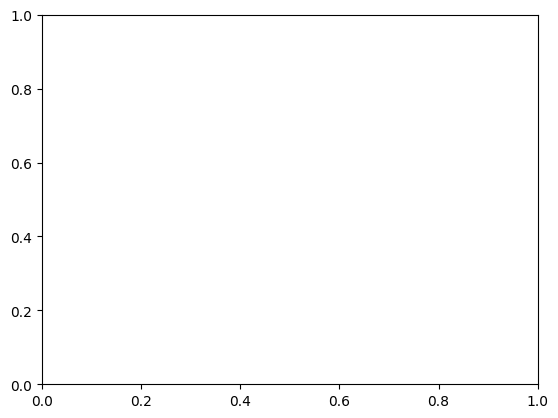

In [83]:
plt.plot(range(2, 7), sse2)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [ ]:
plt.plot(range(2, 7), silhouettes2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [ ]:
sse3 = []
silhouettes3 = []

In [ ]:
for i in range (2, 7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X[:, 0], X[:, 1]], "Kmeans")
    kmeans_cluster_centers.append(kmeans.cluster_centers_)
    sse3.append(kmeans.inertia_)
    silhouettes3.append(silhouette_score(X, kmeans.labels_))

In [ ]:
sse3

In [ ]:
silhouettes3

In [ ]:
plt.plot(range(2, 7), sse3)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [99]:
plt.plot(range(2, 7), silhouettes3)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

NameError: name 'silhouettes3' is not defined

In [117]:
X, y = load('../../preprocessing/clustering_data.joblib')

In [118]:
X.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,Credit_Score,LTV,...,term_280.0,term_288.0,term_300.0,term_312.0,term_320.0,term_322.0,term_324.0,term_336.0,term_348.0,term_360.0
0,-1.731263,0.0,-1.238213,-1.064183,-1.221324,-0.378275,-1.377720,-1.240228,0.502212,1.346983,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
1,-1.731239,0.0,-0.688794,-0.340560,-0.612590,-0.781588,-0.266481,-0.340091,-1.275549,0.666780,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
2,-1.731216,0.0,0.532139,1.144313,-0.279387,-0.822068,0.227403,0.910100,1.158085,0.306245,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
3,-1.731193,0.0,0.837372,0.605938,0.628148,-0.178258,0.844758,1.576869,-0.973502,-0.285784,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
4,-1.731169,0.0,2.302492,0.171764,-0.082786,-1.050270,1.256327,1.176808,-0.844053,0.966366,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526


In [119]:
X1 = X['rate_of_interest']
X2 = X['Interest_rate_spread']
X3 = X['Upfront_charges']
X4 = X['LTV']
X = pd.DataFrame(data=X1, columns=['rate_of_interest'])
X.insert(value=X2, column='Interest_rate_spread', loc=1)
X.insert(value=X3, column='Upfront_charges',loc=2)
X.insert(value=X4, column='LTV', loc=3)

In [120]:
X.head()

,rate_of_interest,Interest_rate_spread,Upfront_charges,LTV
0,-1.064183,-1.221324,-0.378275,1.346983
1,-0.340560,-0.612590,-0.781588,0.666780
2,1.144313,-0.279387,-0.822068,0.306245
3,0.605938,0.628148,-0.178258,-0.285784
4,0.171764,-0.082786,-1.050270,0.966366


In [123]:
X = pca.fit_transform(X)
X

array([[-1.81708075, -0.90374817],
       [-0.84679744, -0.88385599],
       [ 0.46277649, -0.88684691],
       ...,
       [-1.25832883,  0.33355043],
       [-0.07630181,  0.59671624],
       [ 2.09729838,  0.57409941]])

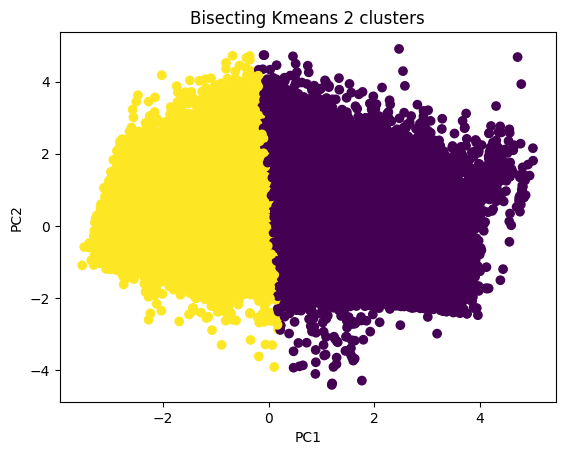

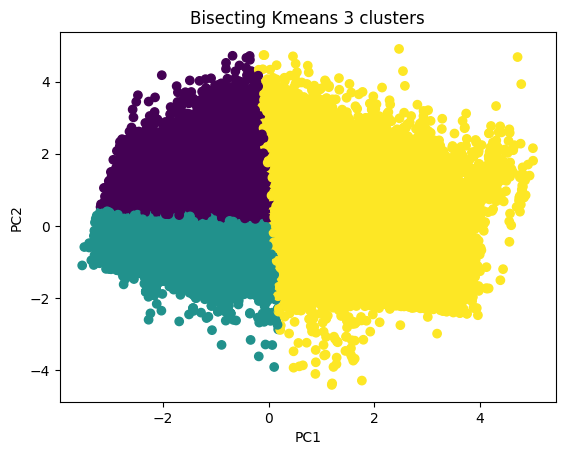

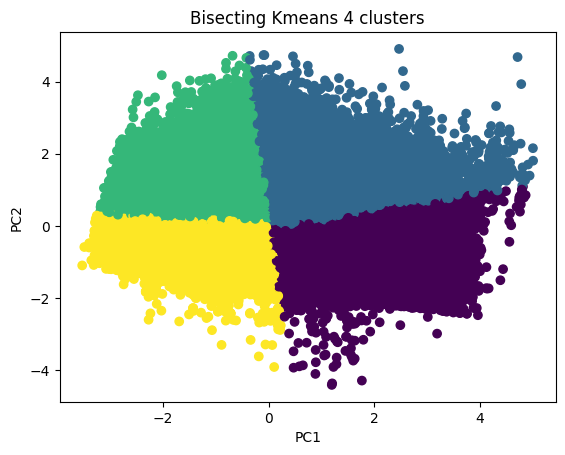

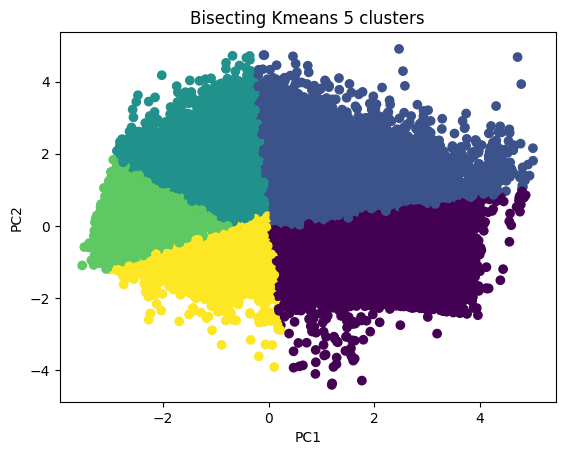

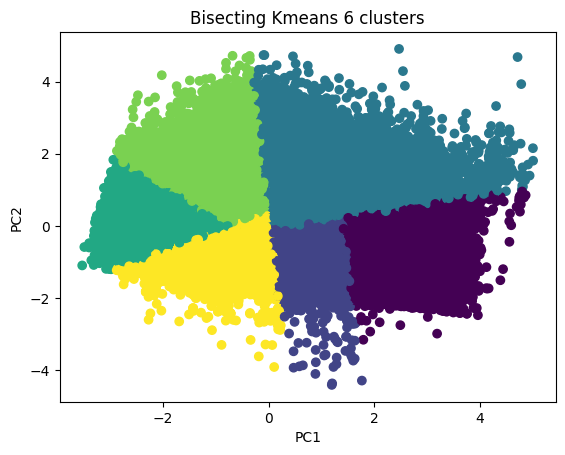

In [125]:
sse5 = []
silhouettes5 = []
kmeans_cluster_centers = []
for i in range (2, 7):
    bkmeans = BisectingKMeans(n_clusters=i,bisecting_strategy='largest_cluster')
    bkmeans.fit(X)
    visualize_clustering(bkmeans.cluster_centers_, bkmeans.labels_, [X[:, 0], X[:, 1]], "Bisecting Kmeans")
    sse5.append(bkmeans.inertia_)
    silhouettes5.append(silhouette_score(X, bkmeans.labels_))
    kmeans_cluster_centers.append(bkmeans.cluster_centers_)

Text(0, 0.5, 'SSE')

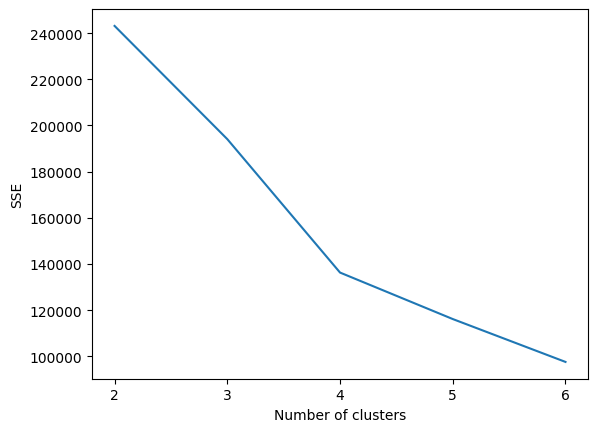

In [126]:
plt.plot(range(2, 7), sse5)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

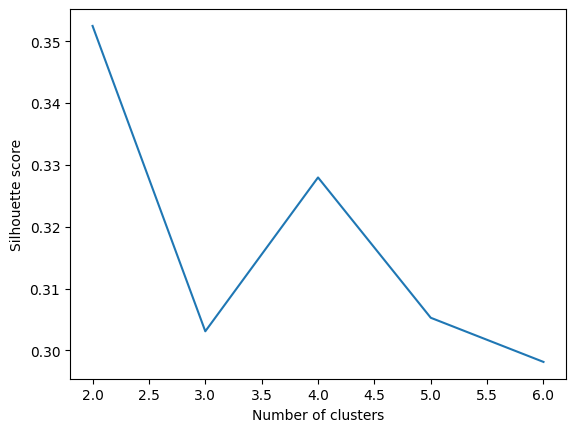

In [127]:
plt.plot(range(2, 7), silhouettes5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [130]:
sse4 = []
silhouettes4 = []

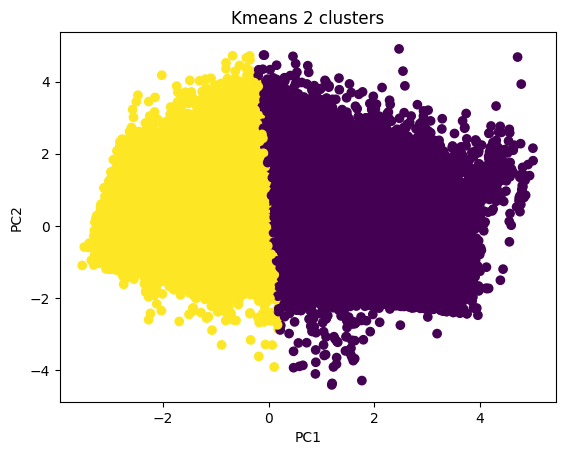

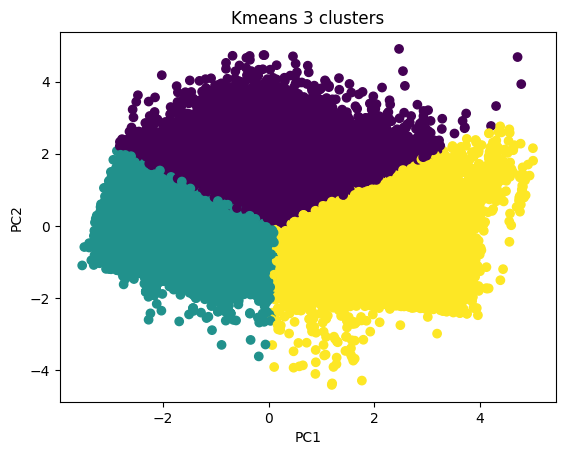

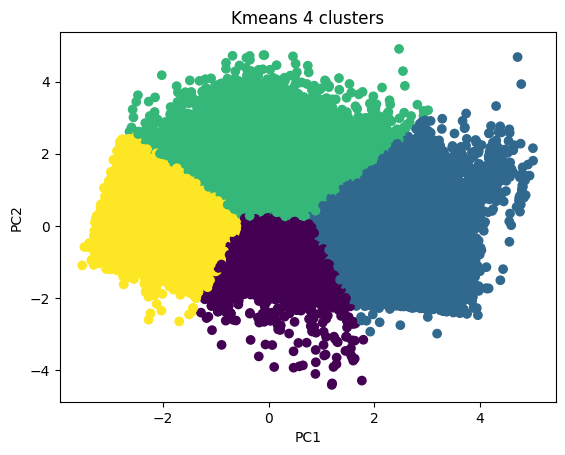

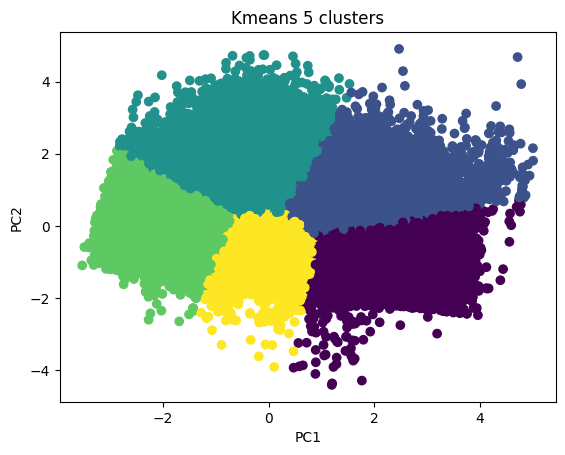

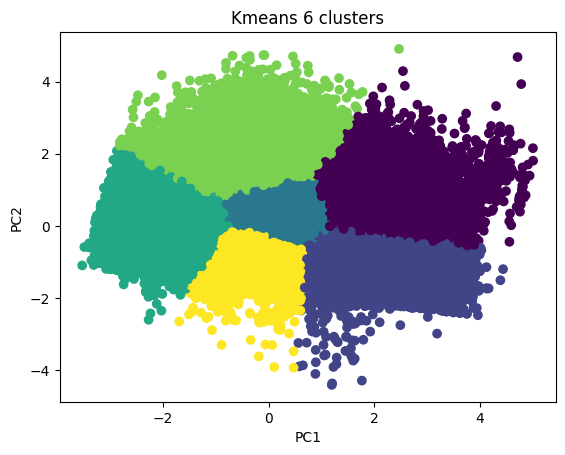

In [131]:
for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, init=kmeans_cluster_centers[i - 2], n_init=1)
    kmeans.fit(X)
    visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X[:, 0], X[:, 1]], "Kmeans")
    kmeans_cluster_centers.append(kmeans.cluster_centers_)
    sse4.append(kmeans.inertia_)
    silhouettes4.append(silhouette_score(X, kmeans.labels_))

Text(0, 0.5, 'SSE')

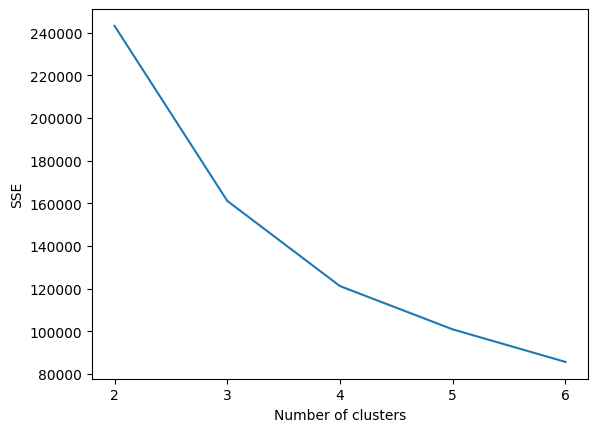

In [132]:
plt.plot(range(2, 7), sse4)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

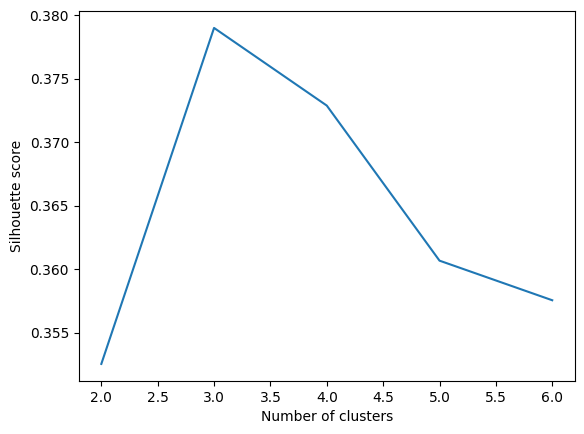

In [133]:
plt.plot(range(2, 7), silhouettes4)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

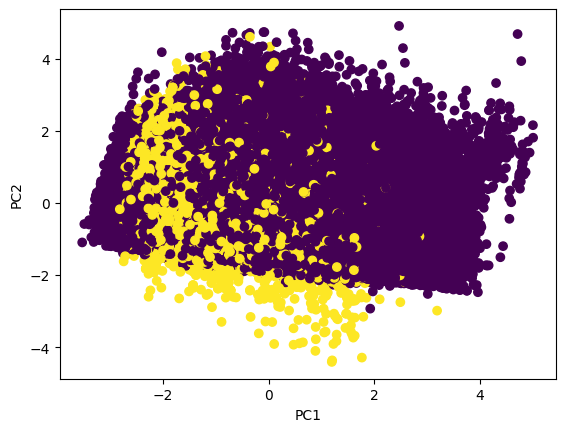

In [142]:
scatter = plt.scatter(X[:,0], X[:,1],c=y, label=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [135]:
def clustering_accuracy(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score

/home/stefan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


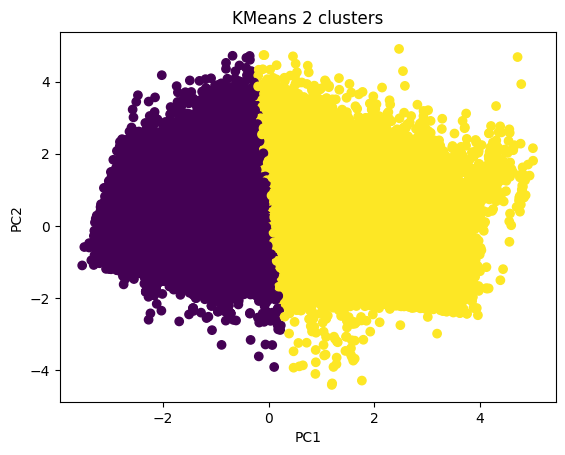

In [143]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X[:,0], X[:,1]], "KMeans")

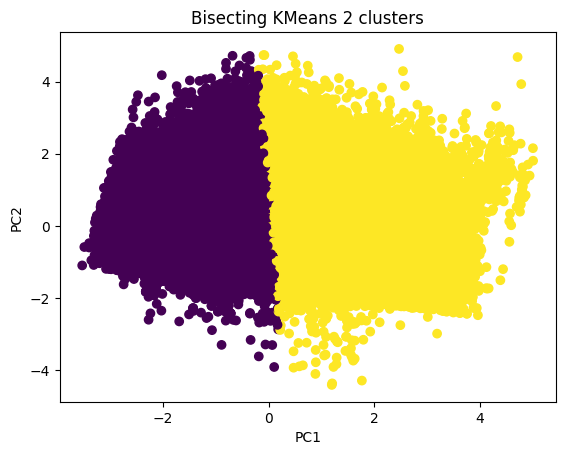

In [144]:
bkmeans = BisectingKMeans(n_clusters=2, bisecting_strategy='largest_cluster', random_state=0)
bkmeans.fit(X)
visualize_clustering(bkmeans.cluster_centers_, bkmeans.labels_, [X[:,0], X[:,1]], "Bisecting KMeans")

In [138]:
clustering_accuracy(y, kmeans.labels_)

35.749022132346255

In [139]:
clustering_accuracy(y, bkmeans.labels_)

35.85677999902038